In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Heart Disease UCI dataset into a Pandas DataFrame.
df = pd.read_csv("../data/heart_disease.csv", index_col='id')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB


In [4]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Fixing Missing Values:
- trestbps
- chol
- fbs
- restecg
- thalch
- exang
- oldpeak
- slope
- ca
- thal

In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


Text(0.5, 1.0, 'Correlations between numeric features')

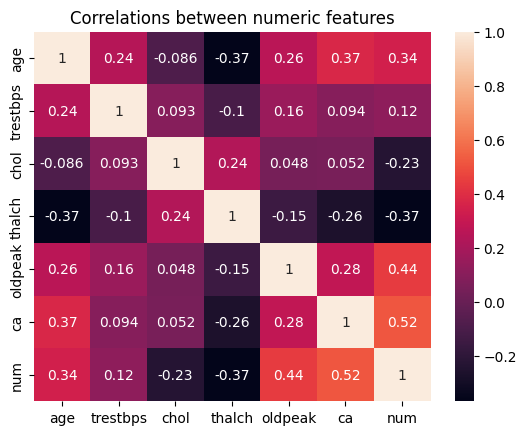

In [9]:
corr = df.select_dtypes(exclude='object').corr()
sns.heatmap(corr, annot=True)
plt.title("Correlations between numeric features")

# There is a strong correlation between ca and traget value
# so we can not remove it

Text(0.5, 1.0, 'Correlations between numeric features')

<Figure size 4800x4800 with 0 Axes>

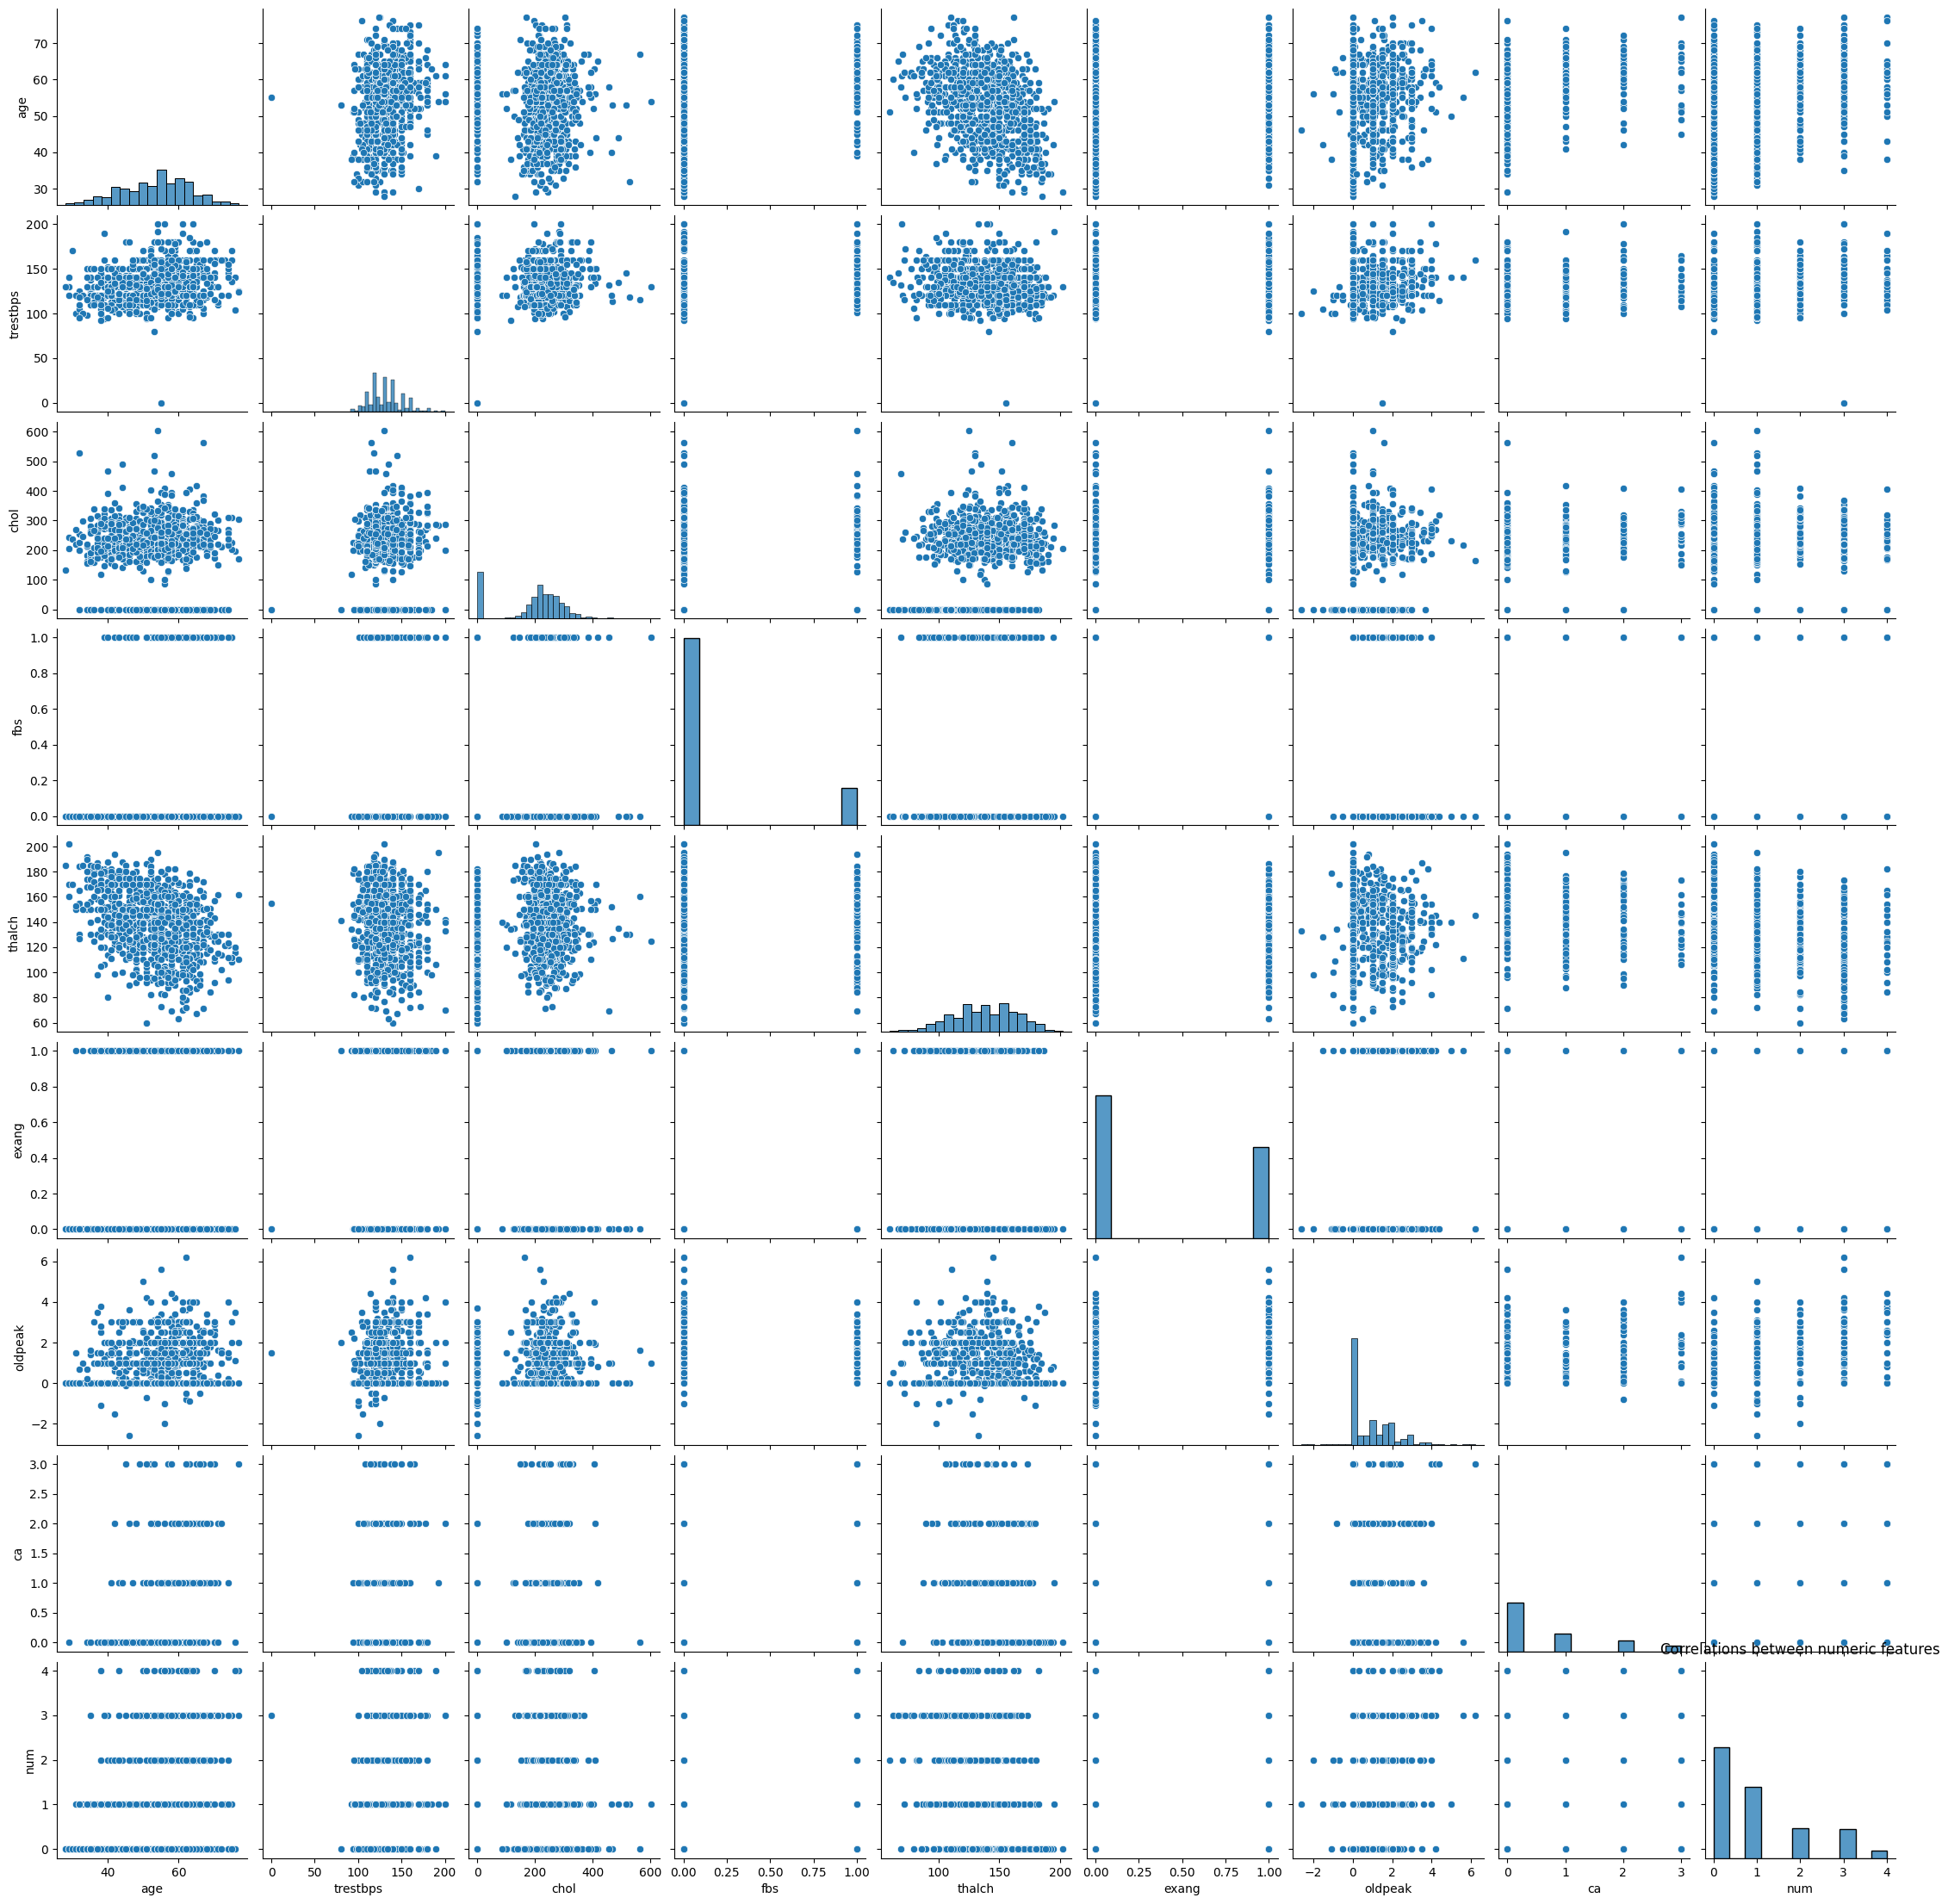

In [10]:
# We can see correlations and distribution in the main diagonal
plt.figure(figsize=(12, 12), dpi=400)
sns.pairplot(df)
plt.title("Correlations between numeric features")

In [11]:
'''
We can see that 'trestbps' has outliers 0 so
I handled by butting normal thersholds then fill with mean
as mean is sensitive to outliers
'''
lower = 80
upper = 200
outliers = df[(df['trestbps'] < lower) | (df['trestbps'] > upper)] 
df = df[(df['trestbps'] >= lower) & (df['trestbps'] <= upper)] 

In [12]:
outliers

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,NaN,NaN,3


In [13]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())

C:\Users\yahia\AppData\Local\Temp\ipykernel_8000\3745968423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())


In [15]:
'''
As there are many outliers I replaced it with median
'''
df.loc[(df['chol'] < 100) | (df['chol'] > 400), 'chol'] = df['chol'].median() # for outliers
df['chol'].fillna(df['chol'].median(), inplace=True) # for missing values

C:\Users\yahia\AppData\Local\Temp\ipykernel_8000\2948616981.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['chol'].fillna(df['chol'].median(), inplace=True) # for missing values
C:\Users\yahia\AppData\Local\Temp\ipykernel_8000\2948616981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chol'].fillna(df['chol'].median(), inplace=

<Axes: xlabel='oldpeak', ylabel='Count'>

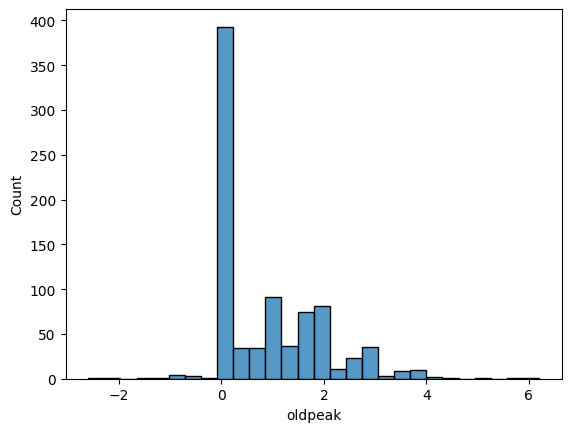

In [16]:
sns.histplot(df['oldpeak'])

In [18]:
# fix outliers with IQR method
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers = df[(df['oldpeak'] < lower) | (df['oldpeak'] > upper)]
df = df[(df['oldpeak'] >= lower) & (df['oldpeak'] <= upper)]

In [19]:
df['thalch'].fillna(df['thalch'].mean(), inplace=True)

C:\Users\yahia\AppData\Local\Temp\ipykernel_8000\4058627915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['thalch'].fillna(df['thalch'].mean(), inplace=True)


In [20]:
mode = df['fbs'].mode()[0]
df['fbs'].fillna(mode, inplace=True)

C:\Users\yahia\AppData\Local\Temp\ipykernel_8000\3252585177.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fbs'].fillna(mode, inplace=True)
C:\Users\yahia\AppData\Local\Temp\ipykernel_8000\3252585177.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'].fillna(mode, inplace=True)


In [21]:
# fill with mode as it is categorical
mode = df['restecg'].mode()[0]
df['restecg'].fillna(mode, inplace=True)

C:\Users\yahia\AppData\Local\Temp\ipykernel_8000\287035377.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['restecg'].fillna(mode, inplace=True)


In [22]:
mode = df['oldpeak'].mode()[0]
df['oldpeak'].fillna(mode, inplace=True)

C:\Users\yahia\AppData\Local\Temp\ipykernel_8000\1968132845.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(mode, inplace=True)


In [23]:
# I chosed KNN as more than 50% of this column is missing and
# the column is correlated with target variable so I can not drop it
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=5)
df[['ca']] = knn.fit_transform(df[['ca']])

<Axes: xlabel='count', ylabel='slope'>

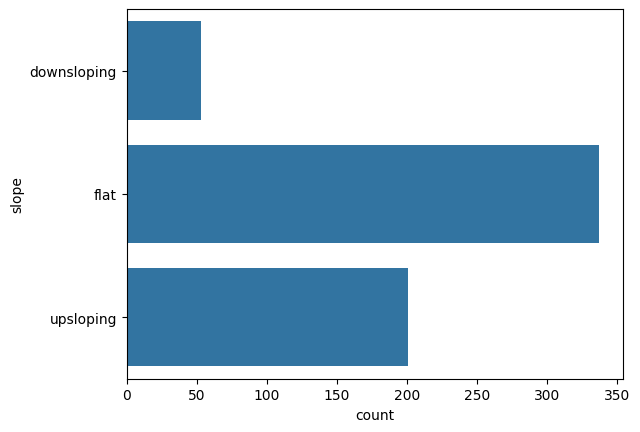

In [24]:
sns.countplot(df['slope'])

In [25]:
mode = df['slope'].mode()[0]
df['slope'].fillna(mode, inplace=True)

C:\Users\yahia\AppData\Local\Temp\ipykernel_8000\2726455295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['slope'].fillna(mode, inplace=True)


## Encoding Categorical data (Ont-hot encoding):
- sex
- dataset
- cp
- fbs
- restecg
- thal

In [26]:
encoded = pd.get_dummies(df.select_dtypes(include='object')).astype(int)
df = df.merge(encoded, on='id') # merge all in one dataset
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
id,,,,,,,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,...,0,0,1,0,1,0,0,1,0,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,...,0,0,0,1,0,1,0,0,1,0
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,...,0,0,0,1,0,1,0,0,0,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,...,1,0,1,0,1,0,0,0,1,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,...,0,0,1,0,0,0,1,0,1,0


## Additional EDA

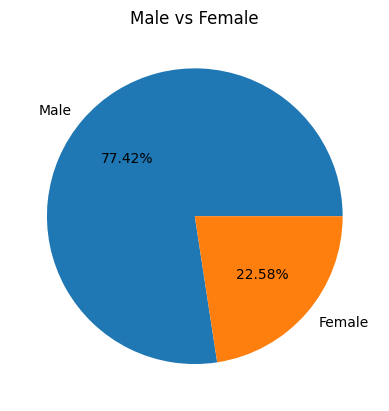

In [28]:
sex = df['sex'].value_counts()
plt.pie(x=sex, labels=sex.index, autopct='%.2f%%')
plt.title("Male vs Female")
plt.show()

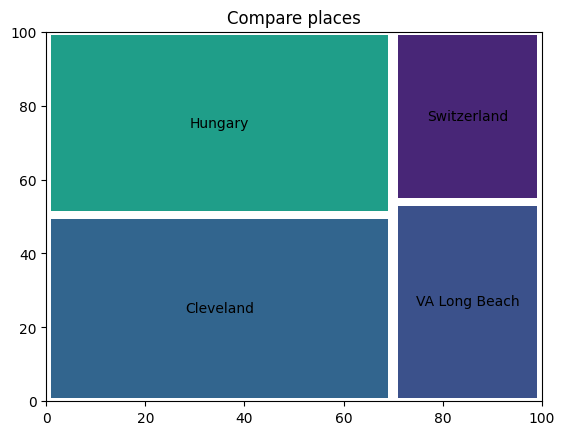

In [33]:
import squarify
cities = df['dataset'].value_counts()
squarify.plot(sizes=cities, label=cities.index, pad=True)
plt.title("Compare places")
plt.show()

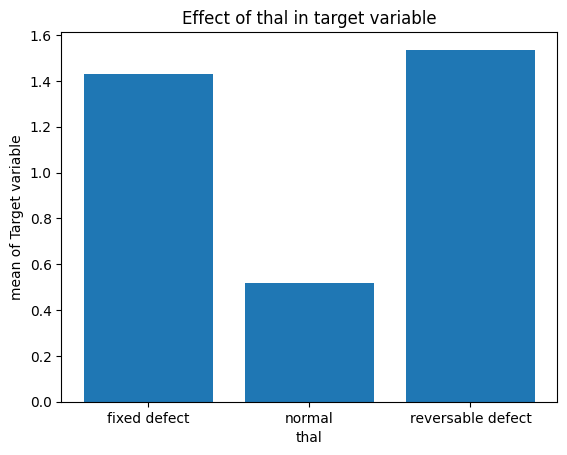

In [35]:
thal_num = df.groupby(['thal']).agg({
  'num': 'mean'
})
plt.bar(height=thal_num.values.flatten(), x=thal_num.index)
plt.xlabel("thal")
plt.ylabel("mean of Target variable")
plt.title("Effect of thal in target variable")
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

# select only numerical features as we
# encoded all categorical features and megred them in df as before
df = df.select_dtypes(exclude='object')

scaler = StandardScaler()
scaled = scaler.fit_transform(df)

df[df.columns] = scaled
df.head()

,age,trestbps,chol,fbs,thalch,oldpeak,ca,num,sex_Female,sex_Male,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
id,,,,,,,,,,,,,,,,,,,,,
1,1.062715,0.705645,-0.127557,2.557448,0.472319,1.512052,-1.194378,-0.848455,-0.540062,0.540062,...,-1.293878,-0.442396,0.786737,-0.786737,3.846096,-1.515017,-0.562172,4.350698,-0.551125,-0.521571
2,1.488922,1.525349,1.089336,-0.391015,-1.153761,0.698104,4.375259,0.986575,-0.540062,0.540062,...,-1.293878,-0.442396,-1.271072,1.271072,-0.260004,0.660059,-0.562172,-0.229848,1.814472,-0.521571
3,1.488922,-0.660530,-0.219398,-0.391015,-0.340721,1.817283,2.518713,0.069060,-0.540062,0.540062,...,-1.293878,-0.442396,-1.271072,1.271072,-0.260004,0.660059,-0.562172,-0.229848,-0.551125,1.917284
4,-1.707626,-0.114060,0.262767,-0.391015,1.904817,2.732975,-1.194378,-0.848455,-0.540062,0.540062,...,0.772870,-0.442396,0.786737,-0.786737,3.846096,-1.515017,-0.562172,-0.229848,1.814472,-0.521571
5,-1.281420,-0.114060,-0.793404,-0.391015,1.324075,0.596361,-1.194378,-0.848455,1.851640,-1.851640,...,-1.293878,-0.442396,0.786737,-0.786737,-0.260004,-1.515017,1.778814,-0.229848,1.814472,-0.521571


In [37]:
# save preprocessed dataset
df.to_csv("../data/cleaned.csv")